In [1]:

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import clear_output
from IPython.utils import io
import torch
import time
from torch import optim
from torch.nn import functional as F
import shutil
import pickle
import os

with io.capture_output() as captured:
  !pip install transformers sentencepiece sentence_transformers xmltodict

from sentence_transformers import SentenceTransformer, SentencesDataset, LoggingHandler, losses
from sentence_transformers.readers import InputExample
from sentence_transformers.evaluation import SentenceEvaluator
from torch.utils.data import DataLoader
from datetime import datetime
import math

from transformers import AdamW, AutoTokenizer, AutoModel, get_linear_schedule_with_warmup
from tqdm.notebook import tqdm

with io.capture_output() as captured:
  !pip install lingtrain_aligner dateparser razdel

from lingtrain_aligner import preprocessor, splitter, aligner, resolver, reader, helper, vis_helper, metrics

sns.set()

создаем модель

In [2]:
model_name = "sentence_transformer_multilingual" #@param ["LaBSE (Russian-Bashkir fine-tuned)", "LaBSE (Russian-Chuvash fine-tuned)", "LaBSE", "Sentence Transformers DistilUSE multilingual v2"] {allow-input: true}

model_names = {
    "sentence_transformer_multilingual (Anfrikaans-English fine-tuned)": 'labse_afr_eng',
    "sentence_transformer_multilingual (Russian-Chuvash fine-tuned)": 'labse_ru_cs',
    "sentence_transformer_multilingual": 'labse',
    "Sentence Transformers DistilUSE multilingual v2": 'st2'
    }

if model_names[model_name] == 'labse_afr_eng':
  if not os.path.isfile('/content/best_model_ba.bin'):
    !gdown --id 1YU5_sdUnc1GORa1HMfyESdgki7OE4X3x
  model = pickle.load(open('/content/best_model_ba.bin', 'rb'))
elif model_names[model_name] == 'labse_ru_cs':
  if not os.path.isfile('/content/best_model_cs4.bin'):
    !gdown --id 1wvAGh7ON_RHuW0I3COFm-DFGQetrUcdL
  model = pickle.load(open('/content/best_model_cs4.bin', 'rb'))
elif model_names[model_name] == 'st2':
  model = SentenceTransformer('distiluse-base-multilingual-cased-v2')
else:
  model = SentenceTransformer('LaBSE')




In [3]:
text2 = """1
Whatever happened, he just didn’t want to make a complete idiot of himself.
Detective Captain Benny Griessel was wearing a new suit of clothes that he could ill afford. There was a bouquet of flowers on the passenger seat, his hands gripping the steering wheel were clammy, and with all his being he yearned for the healing, calming powers of alcohol. Tonight he must just please not make a total idiot of himself. Not in front of Alexa Barnard, not in front of all the stars of the music world, not after all the past week’s planning and preparation.
He’d started on Monday, with a haircut. Tuesday, Mat Joubert’s wife, Margaret, had been his style consultant at Romens in Tyger Valley. ‘It’s smart casual, Benny, just a pair of chinos and a smart shirt,’ she had “said patiently in her charming English accent.
‘No, I want a jacket too.’ Griessel had dug in his heels, terrified of being caught between too ‘casual’ and not ‘smart’ enough. There would be some smart people there.
He had wanted a tie as well, but Margaret had put her foot down. ‘Overdressed is worse than underdressed. No tie.’ They had left with khaki chinos, a light blue cotton shirt, black belt, black shoes, a fashionable black jacket, and a credit card bill that made him shudder.
Since Wednesday he had been mentally preparing himself. He knew this thing, this event, had the potential to overwhelm him completely. His greatest fear was that he would swear, because that was what he always did when he got stressed. He would have to guard his tongue, all evening. No police-speak, no crude language, talk nice, stay calm. He had gone through it all in his imagination, visualised it, as Doc Barkhuizen, his sponsor at Alcoholics Anonymous, had prescribed.
To Anton L’Amour he would say: ‘Kouevuur is brilliant guitar.’ That’s all, no waxing lyrical and talking shit. To Theuns Jordaan: ‘I like your work a lot.’ That was a good thing to say, full of respect and appreciation, dignified. Lord, and if Schalk Joubert was there, he, Benny Griessel would take a deep breath, shake his hand and just say: ‘Pleased to meet you, it’s a great honour.’ Then he had better walk away before the flood of words of hero worship, admiration of Joubert’s mastery of bass guitar, spilled over all his careful defences.
Then, his biggest worry: Lize Beekman.
He had wanted a tie as well, but Margaret had put her foot down. ‘Overdressed is worse than underdressed. No tie.’ They had left with khaki chinos, a light blue cotton shirt, black belt, black shoes, a fashionable black jacket, and a credit card bill that made him shudder.
Since Wednesday he had been mentally preparing himself. He knew this thing, this event, had the potential to overwhelm him completely. His greatest fear was that he would swear, because that was what he always did when he got stressed. He would have to guard his tongue, all evening. No police-speak, no crude language, talk nice, stay calm. He had gone through it all in his imagination, visualised it, as Doc Barkhuizen, his sponsor at Alcoholics Anonymous, had prescribed.
To Anton L’Amour he would say: ‘Kouevuur is brilliant guitar.’ That’s all, no waxing lyrical and talking shit. To Theuns Jordaan: ‘I like your work a lot.’ That was a good thing to say, full of respect and appreciation, dignified. Lord, and if Schalk Joubert was there, he, Benny Griessel would take a deep breath, shake his hand and just say: ‘Pleased to meet you, it’s a great honour.’ Then he had better walk away before the flood of words of hero worship, admiration of Joubert’s mastery of bass guitar, spilled over all his careful defences.
Then, his biggest worry: Lize Beekman.
If he could just have one drink before he met her. To keep his nerves from getting out of control. He would have to dry his hand on his new trousers first, he couldn’t greet Lize Beekman with his palm all sweaty. ‘Miss Beekman, it’s an exceptional honour. Your music gives me great pleasure.’ And she would say ‘thank you’, and he would leave it at that and go and find Alexa, because that was the only way he would keep from making a total idiot of himself.
The white Chana panel van stopped under the trees in Second Avenue, between the Livingstone High School and the back yard of the South African Police Service’s Claremont Station.
It was a nondescript vehicle, a 2009 model bearing the marks of hard labour – a dent in the front bumper, scrapes and scratches on the doors at the back. The windows in the middle and rear were blanked out with cheap white paint. The side panels differed slightly in colour from the rest of the vehicle.
Behind the wheel, the sniper turned off the engine, put both hands on his knees and sat, for just a moment, dead still.
He wore a blue labourer’s overall, slightly faded. Long blond hair hung down his back, a 
brown baseball cap was pulled down low over his eyes.
With deliberate focus he looked out of the passenger window at the deserted school grounds. Then right. He studied the high fence across the street, the double wire gate, and behind it, the SAPS yard, wrapped in the early-evening shadow of Table Mountain. It was quiet and deserted.
He made sure both doors in front were locked, clambered over the seat to the back. The storage space was untidy, boxes and trunks of metal, wood and cardboard. He sat down on a wooden box and loosened the home-made screen of faded yellow material from the carpet-lined roof. It separated him from the driver’s cab, making him invisible to passers-by.
He took off the cap, laid it to one side, aware that he was breathing faster, his hands trembling slightly. He relaxed his shoulders with a forced sigh, bent down, opened a long, battered tool chest, and took out the removable tray. It was heavy, filled with well-worn tools – hammers, a collection of screwdrivers, cutters and pliers, metal saw blades. He put it gently down beside the chest, on the rubber matting covering the floor of the Chana.
There were two articles in the bottom of the red box – a firearm and a K-Way Kilimanjaro Trekking Pole.
He took out the hiking pole first, and propped it against his shoulder, picked up the rifle, pressed the silencer carefully through the black wrist strap on the end of the stick, so that the telescope of the rifle was not interfered with, and twisted the stick anti-clockwise until the loop was tight.
He pressed his cheek to the rifle butt, tested the height of the supporting hiking pole, and made an adjustment.
He slid the Chana’s right side panel three centimetres to the right with the small handle he had attached. Then the magnetic panel outside, so he could aim the barrel and telescope outwards.
He pressed the rifle butt to his shoulder and looked at the SAPS car park through the scope. He adjusted the focus.
In front of the big Victorian house in Brownlow Street, Griessel picked up the bouquet, got out of the car and walked through the little garden gate to the front door.
Alexa Barnard was in the process of renovating the house. The ugly giant cactus against the front fence had been recently removed, the painters’ scaffolding stood high against the walls.
It was all part of her recovery, he thought. Her new life.
He came to a halt at the front door, looked at his shoes. They gleamed.
He took a deep breath. What if he had misunderstood the whole thing, and it was a black-tie affair tonight, and Alexa opened the door in some exotic evening dress? Or it was totally informal, denims and open-neck shirts? He had never been to a music industry cocktail party before.
He rang the doorbell, heard her coming down the stairs.
The door opened. She stood in front of him.
‘Jissis,’ said Griessel.
Through the peephole the sniper saw the police van drive by close to the Chana. It slowed, ready for the turn in at the wide gate.
He waited for it to reappear in the car park in his field of vision. He kept his cheek pressed to the rifle butt, followed the van through the scope.
Only one occupant, in uniform.
The van drove over the tarred surface to the middle of the open area. It parked behind two other SAPS vehicles where he couldn’t see it.
Between seventy and eighty metres, he guessed.
As he aimed the cross hairs on the front of one of the vehicles, waiting for the policeman to appear, he suddenly became aware of the beating of his heart.
He took a deep breath.
The uniform appeared in the telescope. A constable.
Difficult shot, moving target.
He aimed low, followed the movement, forced himself to stick to his procedure: keep the horizontal axis of the scope level, cross hairs on the target, breathe out, press the trigger gently, keep your eye open.
The rifle kicked softly against his shoulder, the muffled blurt of the shot was louder than he had expected, within the Chana’s enclosed space.
A miss.
‘You look …’ Griessel wanted to say ‘befok’, but he restrained himself, searched desperately for an acceptable word, one that would do her breathtaking appearance justice ‘… fantastic.’ She was standing there in a strapless black dress that draped to her ankles, a wide, tan leather belt just below her generous breasts, light brown platform sandals.
And her face – he had never seen her like this: carefully and skilfully made up, red, full lips, blonde hair cut and coloured, big silver hearts as earrings, her eyes a deep green behind long lashes.
For one fleeting moment he wondered, after everything, whether he would kiss her tonight for the first time.
She laughed and looked at him approvingly. ‘You too, Benny.’ Then, ‘Are the flowers for me?’
‘Oh. Yes …’ He held them out to her awkwardly.
There was a blush on her cheeks, genuine appreciation for him, for this gesture.
‘Thank you very much.’ She stepped forward and kissed Griessel on the cheek.
He knew from experience the shot was barely audible outside, thanks to the silencer and the pieces of carpet glued to the Chana’s interior. His palms perspired against the gun and his heart thumped. He worked the bolt, and the bullet casing sprang out, clinked against one of the toolboxes. He pushed another round into the chamber. He moved the weapon slightly, saw through the scope that the constable was unaware of the failed shot, his head turned away towards the mountain.
He aimed down, found the constable’s legs in the cross hairs.”
He led two, three centimetres ahead of moving legs, knee height, the panic blooming from the pit of his stomach, breathe, breathe, exhale slowly … He squeezed the trigger. Saw the constable fall.
Relief. Smell of cordite in his nostrils.
Then, urgency, knowing he must concentrate now, the next sixty seconds were make or break, do everything exactly according to the plan.
Unwind the strap of the support stick. Withdraw the rifle from the loop. Lay the weapon in the toolbox. Put the tray over it. Close the box. The pole can stay there.
Lift up the cloth drape.
The cap. Put on the cap.
He climbed through to the driver’s seat.
Do not look at the target, do not, but the anxiety threatened to overwhelm him, so he quickly turned his head to see. The constable was eighty metres away, lying there. He was looking down, probably at his leg.
Look in front of you.
Turn the key, start the Chana, pull away slowly, only ten metres and you will be out of sight, seconds, not enough for the constable to see you, to notice, he will be in shock, confused. Don’t attract attention, do everything calmly, normally.
He put the vehicle in gear. And drove away.

2
At the entrance to the Artscape Chandelier Foyer Griessel stared at the giant poster. In big letters it proclaimed Anton Goosen Birthday Concert, Friday 4 March, Grand Arena, with a photo below of all the stars who would be performing there in a week’s time. Alexa Barnard was the focal point, right in the middle, just below the smaller announcement which used her stage name: Xandra Barnard is back!
And here he was with that legend on the arm of his new jacket. He swallowed hard, and held himself together.
Inside. Lots of people. He quickly surveyed the men, what they were wearing. Relief washed over him, because there were a lot of jackets. He relaxed a little, everything was going to be OK.
Heads turned towards Alexa, people called out her name, and suddenly they were surrounded. Alexa let go of his arm and began greeting people. Griessel stood back. He had suspected this would happen and was happy she was getting this reception. Last week she had been nervous and had told him: ‘I’ve been out of it for so long, Benny. And that whole thing with Adam’s death … I don’t know what to expect.’
Adam had been her husband. Benny had investigated his murder; that was how he had met her.
‘You’re Paul Eilers, the actor,’ someone said right beside him. Then he realised the pretty young woman was talking to him.
‘No,’ he said. ‘I’m Benny Griessel.’
‘I could have sworn you were Paul Eilers,’ she said, disappointed, and then she was gone.
He recognised some of the music stars. Laurika Rauch folding Alexa’s hands in hers, saying something with great tenderness. Karen Zoid and Gian Groen in conversation. Emo Adams making Sonja Herholdt laugh out loud.
Where was Lize Beekman?
A waiter pushed through the mass of bodies, came past with a tray full of champagne glasses, offered him one. He stared at the golden liquid, the bubbles lazily drifting upwards, and felt the stirring inside, the desire. He came to his senses, shook his head. No, thank you.
Two hundred and twenty-seven days without a drink.
Maybe he ought to get himself a soft drink, something to hold in his hand, rather than just standing here, a dull island in a sea of glitterati.
Look at Alexa, she was at home, in her element, she glowed.
Jissis. What was he doing here?
When he met Schalk Joubert the moment was almost too big for him.
‘Schalk, this is Benny Griessel, he also plays bass,’ Alexa introduced him, and he could feel his face turn red. With a trembling hand, ‘Pleased to meet you, it’s a helluva privilege.’ His voice was hoarse and he was startled by the swear word that slipped out.
‘Ah, a brother. Thank you very much, the privilege is all mine,’ said Schalk Joubert easily and comfortably, his tone smoothing away Griessel’s fears, making him relax. The enormous compliment of ‘a brother’ filled Griessel with gratitude, so that, in the light of Alexa’s encouraging smile, he found the courage to strike up a conversation with Theuns Jordaan and Anton L’Amour. He asked them how Kouevuur had been put together. And then, emboldened by their generosity: ‘So when are you going to record “Hexriviervallei” properly, a complete track? That song deserves it.’
He began to unwind, chatting here, laughing there, wondering what he had been so worried about. He felt almost proud of himself, and then Alexa tugged at his arm and he turned around and saw Anton Goosen and Lize Beekman, side by side, right in front of him, conspiratorial, a moment of silence that opened up in the hubbub and it was too sudden and too much and his brain shut down and his heart beat wildly and he grabbed for the tall, beautiful, blonde singer’s hand, completely star-struck, and all that came out of his mouth, the word idiotically long and drawn-out and clear in the silence, was: ‘Fok.’
And then his cellphone began to ring in his jacket pocket.
He just stood there. Frozen.
Somewhere in his head the impulse came: Do something.
He dropped Lize Beekman’s hand. Shame and humiliation burning through him, he mumbled, ‘Excuse me.’ He fumbled for his phone, turned away, pressed the instrument to his ear.
‘Hello.’ Even his own voice sounded strange to him.
‘Benny, I need you,’ said Brigadier Musad Manie, commanding officer of the Hawks. ‘Like now.’
He drove, too fast, angry with himself, angry with Alexa, how could she do that to him? Angry with the cellphone for ringing, he could definitely have recovered from his massive mistake, he could have added something, his practised sentence of ‘this is a special privilege’, it would have defused the whole mess. Angry with the brigadier making him come in on a Saturday night, his weekend off, angry because he couldn’t get the damning chorus out of his head: he had made a complete and total arse of himself. That awful moment, the word uttered, hanging like a dead, black bird between him and Lize Beekman, everything frozen except the irritating ringing of his cellphone and the knowledge that sank down in him like lead: he had made a massive unforgivable arse of himself, in spite of all his resolutions and plans and preparations.
It was really Alexa’s fault. She had wanted to know who he was keen to meet, two weeks ago already. From the beginning he had said nobody, he would just be around, available when she needed him. Because he knew he might lose it. But she had drawn the names out of him one by one, and she had said, ‘I really want to do this for you,’ and he had said, ‘No, please,’ but with ever diminishing conviction, because the prospect began to tempt him. Until he had agreed, for her sake, but the butterflies had been in his belly already, the faint terror, no, the premonition that he might not handle it well.
His fault. Just his own fucking fault.
He knew there was big trouble when he saw the three senior officers of the DPCI – the Directorate for Priority Crime Investigations – and General John Afrika, Western Cape head of Detective Services and Criminal Intelligence.
The burly Brigadier Musad Manie, commander of the Hawks, sat in the middle with a face of granite. On either side were Colonel Zola Nyathi, head of the Violent Crimes Group, and Griessel’s immediate boss, and Colonel Werner du Preez, group head of Crimes Against the State (CATS). Afrika was on the opposite side of the table.
They greeted him, Manie invited him to sit down. Griessel saw there were files and documents in front of each of the senior officers.
‘Sorry to interrupt your evening, Benny,’ said the brigadier. ‘But we’ve got a problem.’
‘A nasty problem,’ said Afrika.
Colonel Nyathi nodded.
The brigadier hesitated, holding his breath, as if there was a lot more to say. Then he reconsidered, pushed a sheet of paper across the table. ‘Let’s start with this.’
Griessel pulled the paper towards him, began to read, conscious of the four sets of eyes on him.
762a89z012@anonimail.com
Sent: Saturday 26 February. 06.51
To: j.afrika@saps.gov.za
Re: Hanneke Sloet – you were warned
Today it is precisely 40 days since Hanneke Sloet was murdered. That is
40 days of cover-up. You know why she was murdered.
This is my fifth message but you don’t listen. Now you leave me no choice. Today I will shoot a policeman. In the leg. And every day I will shoot a policeman, until you charge the murderer.
If you don’t have a report in the newspaper tomorrow that says you have reopened the Sloet case, the next bullet will not be in the leg.
No name. Griessel looked up.
‘As you can see, this was sent this morning,’ said the brigadier. ‘And tonight Constable Brandon April was shot by a sniper in the leg in the parking lot of the Claremont Station. Just before seven.’
‘Long distance shot,’ said Afrika. ‘They’re still looking for the bastard’s vantage point.’
‘The knee is bad,’ said Nyathi. ‘Shattered.’
‘A young man,’ said Afrika. ‘Won’t ever walk normally again. This crazy bastard …’ and he pointed at the email in Griessel’s hands, ‘has written to me four times. Very confused emails, they don’t make sense.’ He tapped the file in front of him. ‘You’ll see.’
The brigadier leaned forward. ‘We would like to announce that you will be leading the reopened investigation into the Sloet case, Benny.’
‘I personally asked the brigadier if we could give it to you,’ said Afrika.
‘Cloete is currently working on the Sunday papers, he says there’s a chance we can get something into the Weekend Argus and Rapport’s Cape section,’ said Manie. Cloete was the liaison officer of SAPS who handled the press.
‘We are going on radio as well, but I don’t know if that will help,’ said Afrika.
‘It’s a bit of a mess,’ said Nyathi, his frown deepening. ‘To say the least.’
‘If you’re willing, Benny. We will back you up. All of us.’
Griessel put the sheet of paper down on the table, straightened his new, fashionable black jacket and asked: ‘Hanneke Sloet … she was the lawyer?’"""


In [4]:
text1 = """Dag 1
Saterdag
1
Hy wil net nie 'n gat van homself maak nie.
Speurder-kaptein Bennie Griessel is in 'n nuwe stel klere wat hy nie kan bekostig nie, met 'n bos blomme op die passasiersitplek, sy hande swetend op die stuurwiel, sy hele wese hunkerend na die helende, senu-kalmerende kragte van drank. Want vanaand wil hy asseblief tog nie 'n gat van homself maak nie. Nie voor Alexa Barnard nie, nie voor musieksterre nie, nie ná al die voorbereidings van die afgelope week nie.
Maandag al het hy sy hare laat sny. Dinsdag was Mat Joubert se vrou, Margaret, sy klere-konsultant by Romens in Tygervallei. "Dis smart casual, Bennie, net chino's en 'n mooi hemp," het sy geduldig in haar sjarmante Engelse aksent gesê.
"Nee, 'n baadjie ook," het Griessel vasgeskop, baie bang vir te "casual", en nie "smart" genoeg nie. Want daar gaan smart mense wees.
Hy wou 'n das ook hê, maar Margaret het haar voet neergesit.
"Overdressed is erger as underdressed. No tie."
Toe is hulle daar uit met kakie-chino's, 'n ligblou katoenhemp, swart gordel, swart skoene, 'n byderwetse swart baadjie en 'n kredietkaartrekening wat hom laat sidder het.
En van Woensdag af berei hy homself geestelik voor, want hy weet dié ding, hierdie geleentheid, het die potensiaal om hom heeltemal te oorweldig.
Sy grootste vrees is vloek, want dis wat hy doen as hy benoud raak.
Hy sal 'n wag voor sy mond moet plaas, die hele aand lank.
Geen polisietaal nie, geen kru woorde nie, mooi praat, kalm bly.
Daarom het hy dit alles deurdink,"geprevisualiseer", soos Dok Barkhuizen, sy borg by Alkoholiste Anoniem, voorgeskryf het. Vir Anton L'Amour sal hy sê: "Kouevuur' is briljante kitaar." Dis al, moenie begin liries raak en kak praat nie. Vir Theuns Jordaan: "Ek hou baie van jou werk." Dis 'n goeie ding om te sê, vol respek en waardering, waardig. Here, en as Schalk Joubert daar is, gaan hy wat Bennie Griessel is diep asemhaal, bladskud, net sê: "Aangename kennis, dit is 'n groot voorreg." Dan moet hy liewer loop voor die stortvloed van heldevererende, baskitaar-bewonderende woorde oor sy keerwalle spoel.
En dan, sy groot bekommernis: Lize Beekman.
As hy net een dop kan maak voor hy haar ontmoet. Om te keer dat sy senuwees handuit ruk.
Hy sal sy hand eers aan sy nuwe broek moet afvee, want hy kan nie vir Lize Beekman groet as dit so gesweet is nie. "Juffrou Beekman," sal hy sê. Met 'n beheerste, vriendelike glimlag. "Juffrou Beekman, dit is 'n uitsonderlike voorreg." Nee, nee, dis nie die woord wat prof.
Phil Pagel, die staatspatoloog, voorgestel het nie. Dit was "sonderlinge".
"Juffrou Beekman, dit is 'n sonderlinge voorreg. Jou musiek gee my groot genot." En sy sal "baie dankie" sê, en dan sal hy sy bek hou en vir Alexa gaan soek, want dit is al manier hoe hy nie 'n gat van homself gaan maak nie.
Die wit Chana-paneelwa hou stil onder die bome in Tweedelaan, tussen die Hoërskool Livingstone en die agterplaas van die Suid-Afrikaanse Polisiediens se Claremont-stasie.
Dit is 'n onopvallende voertuig, 'n 2009-model wat die letsels van harde werk dra 'n duik in die voorste buffer, skaaf-en krapmerke agter by die laaideur. Die vensters in die middel en agter is ondeursigtig gemaak met goedkoop wit verf.
Buite verskil die sypanele se kleur effens van die res van die voertuig. Agter die stuurwiel skakel die sluipskutter die enjin af, plaas al twee sy hande op sy knieë en sit net vir 'n oomblik, doodstil. 
Hy het 'n blou werkersoorpak aan, effe verbleik. Blonde hare lê lank teen sy rug af, 'n bruin bofbalpet is laag oor sy oë getrek.
Hy kyk met doelgerigte fokus eers deur die linkervoorvenster, na die verlate skoolgronde. Dan regs. Hy bestudeer die hoë heining oorkant die straat, die dubbele draadhek, en daaragter, die SAPD-werf, in die vroegaand in Tafelberg se skaduwee gehul. Dit is stil en verlate.
Hy maak seker die twee deure voor is gesluit, klouter oor die sitplek na agter. Die pakruimte is deurmekaar, kiste en kaste van metaal, hout en karton. Hy gaan sit op 'n houtkassie en maak die tuisgemaakte skerm van verbleikte geel materiaal teen die tapytbeplakte dak los.
Dit skei hom af van die stuurkajuit, maak hom onsigbaar vir verbygangers.
Hy haal die pet af, plaas dit eenkant, bewus daarvan dat sy asem begin jaag, dat sy hande effens bewe. Hy ontspan sy skouers met 'n gedwonge sug, leun af en maak 'n lang, verweerde gereedskapkis oop, en verwyder die uittellaai. Dit is swaar, gevul met goedgebruikte gereedskap hamers, 'n versameling skroewedraaiers, knipen knyptange, ystersaaglemme. Hy plaas dit sag langs die kis neer, op die rubbermat wat die Chana se vloer bedek.
Daar is twee artikels onderin die rooi kis 'n vuurwapen en 'n K-Way Kilimanjaro Trekking Pole.
Hy haal die wandelstaf eerste uit, en laat dit teen sy skouer staan, tel die geweer op, druk die knaldemper voor versigtig deur die swart lusband aan die punt van die staf, sodat die teleskoop aan die vuurwapen onaangeraak bly, en draai die staf antikloksgewys, tot die band styf is.
Hy druk sy wang teen die kolf, toets dan die hoogte van die wandelstaf-stut, en maak 'n verstelling.
Hy skuif die Chana se regtersypaneel met drie sentimeter na regs, aan die klein handvatsel wat hy aangebring het.
Daarna die magnetiese paneel buite, sodat hy die loop en teleskoop na buite kan rig.
Hy druk die kolf teen sy skouer en kyk deur die skoop, na die SAPD-parkeerterrein. Hy stel die fokusring.
Voor die groot Victoriaanse huis in Brownlowstraat vat Griessel die blomme, klim uit en loop deur die tuinhekkie voordeur toe.
Alexa Barnard is besig om die huis op te knap. Voor teen die heining is die lelike, reusagtige kaktus onlangs verwyder, teen die huis staan die verwers se stellasies hoog.
Alles deel van haar herstelproses, dink hy. Haar nuwe lewe.
Hy gaan staan voor die deur, kyk af na sy skoene. Hulle blink.
Hy haal diep asem. Sê nou maar hy het die ding verkeerd verstaan, en dis 'n pikkewynpak-en-strikdas-ding vanaand, en Alexa maak die deur in die een of ander eksotiese aandrok oop? Of dis heeltemal informeel, denims en oop hemde. Hy was nog nooit by 'n musiek-skemerkelk nie.
Hy lui die voordeurklokkie, hoor hoe sy afkom met die trappe.
Die deur gaan oop. Hy sien haar.
"Jissis," sê Griessel.
Deur die loergat sien die sluipskutter die polisiebakkie wat hier reg langs die Chana verbyry, stadig, om by die groot hek in te draai.
Hy wag dat dit weer in sy gesigsveld kom, in die parkeerterrein.
Hy druk sy wang teen die geweerkolf, volg die bakkie met die teleskoop.
Net een insittende, in uniform.
Die bakkie ry oor die teerblad tot in die middel van die oop terrein. Dit kom tot stilstand agter twee ander SAPD-voertuie, buite sy sig.
Tussen sewentig en tagtig meter, skat hy.
Hy rig die kruisvisier op die voorpunt van een van die voertuie, wag dat die polisieman te voorskyn moet kom, skielik bewus van sy hart wat klop.
Hy haal diep asem.
Die uniform verskyn in die teleskoop. 'n Konstabel.
Moeilike skoot, bewegende teiken.
Hy mik laag, volg die beweging, dwing homself om by sy prosedure te bly: Hou die horisontale as van die teleskoop gelyk, kruispunt op die teiken, asem uit, druk die sneller saggies, hou sy oog oop.
Die geweer skop sag teen sy skouer, die gedempte prut van die skoot harder as wat hy verwag het in die binneruim van die Chana.
Mis.
"Jy lyk …" Griessel wil sê "befok", maar hy bedwing hom, soek desperaat na 'n aanvaarbare woord, een wat reg sal laat geskied aan haar asembenemende voorkoms. "… fantasties." Want sy staan daar, in 'n skouerlose swart rok tot by haar enkels, breë, taankleurige leergordel net onder haar ruim borste, ligbruin platformsandale.
En haar gesig hy het haar nog nooit só gesien nie: Sorgsaam en behendig gegrimeer, die rooi, vol lippe, die blonde hare geknip en gekleur, groot silwer hartjies as oorbelle, haar oë 'n diep groen agter die lang wimpers.
Vir 'n vlietende oomblik wonder hy of hy haar dalk vanaand, ná alles, die eerste keer gaan soen.
Sy lag en kyk waarderend na hom. "Jy ook, Bennie." En dan: "Is die blomme vir my?"
"O. Ja …" Hy hou dit ongemaklik na haar toe uit.
Daar is 'n blos op haar wange, opregte waardering vir hom, vir dié gebaar.
"Baie dankie." Sy tree vorentoe en soen Griessel op die wang.
Hy weet uit ervaring die skoot is byna onhoorbaar buite, danksy die knaldemper en die stukke tapyt wat aan die Chana se binneruim geplak is. Sy palms sweet teen die geweer en sy hart klop. Hy bewerk die slot en die patroondoppie spat, klink teen een van die gereedskapkiste. Hy stoot 'n nuwe rondte in die kamer in. Hy beweeg die wapen effens, sien deur die teleskoop die konstabel is onbewus van die mislukte skoot, sy kop weggedraai berg se kant toe.
Hy mik ondertoe, kry weer die konstabel se bene in die kruis.
Lei twee, drie sentimeter voor die bewegende bene, kniehoogte, die paniek wat hier van die krop van sy maag af uitblom, haal asem, haal asem, blaas stadig uit … Hy druk die sneller. Sien die konstabel val.
Verligting. Reuk van kordiet in sy neus. Dan, dringendheid, die wete dat hy nóu moet fokus, die volgende sestig sekondes is maak of breek, doen net alles volgens die plan.
Draai die stutstok se band los. Trek die geweer uit die lus. Lê die geweer in die gereedskapkis. Sit die laai bo-op. Maak die kis toe, staf kan maar daar lê.
Trek die materiaalafskorting op.
Die pet. Sit die pet op.
Hy klim deur tot in die bestuurdersitplek.
Moenie na die teiken kyk nie, moenie, maar die angstigheid wil hom oorweldig, sodat hy vinnig sy kop draai om te sien. Die konstabel is tagtig meter weg, hy lê daar. Hy kyk af, vermoedelik na sy been.
Kyk voor jou.
Draai die sleutel, skakel die Chana aan, trek stadig weg, net tien meter en jy is buite sig, sekondes, te min vir die konstabel om jou te sien, om waar te neem, hy sal in skok wees, verward. Moenie aandag trek nie, doen alles rustig, normaal.
Hy sit die voertuig in rat. En hy ry.

2
By die ingang van die Kunstekaap se Kandelaar-foyer staar Griessel na die reuseplakkaat. Dit proklameer in groot letters Anton Goosen Verjaardagkonsert, Vrydag 4 Maart, Grand Arena, met daaronder 'n foto van al die sterre wat oor 'n week daarin gaan optree. Alexa Barnard is die fokuspunt, reg in die middel, net onder die kleiner aankondiging: Xandra Barnard is terug!
En hier staan hy met dié legende aan sy nuwe baadjie se arm, en hy sluk, en hy hou hom in.
Binne. Baie mense. Hy bespied vinnig die mans se kleredrag. Verligting daal oor hom, want daar's baie baadjies. Hy ontspan so 'n bietjie, alles gaan O.K. wees.
Koppe draai na Alexa toe, mense roep haar naam uit, en dan is hulle skielik omsingel. Alexa los sy arm en begin groet. Griessel staan terug. Hy het vermoed dit gaan gebeur en is bly dat sy dié ontvangs kry. Sy was verlede week senuagtig en het vir hom gesê: "Ek was so lank uit, Bennie. En die hele ding met Adam se dood … Ek weet nie wat om te verwag nie."
Adam was haar man. Bennie het sy moord ondersoek, dit is hoe hy haar ontmoet het.
"Jy's Paul Eilers, die akteur," sê iemand hier reg langs hom.
Dan besef hy die mooi jong vrou praat met hóm.
"Nee," sê hy. "Ek is Bennie Griessel."
"Ek kon sweer jy's Paul Eilers," sê sy teleurgesteld, en dan is sy weg.
Hy herken van die musieksterre.Laurika Rauch wat Alexa se hande in haar eie toevou, met groot deernis iets sê. Karen Zoid en Gian Groen in gesprek. Emo Adams wat Sonja Herholdt laat skater van die lag.
Waar is Lize Beekman?
'n Kelner beur deur die massa mense, kom verby met 'n skinkbord vol sjampanjeglase, bied hom een aan. Hy staar na die goue vog, die borrels wat so lui na bo sweef, en voel die roering in hom, die begeerte. Hy kom tot verhaal, skud sy kop. Nee dankie. Tweehonderd-twee-en-sewentig dae sonder drank.
Miskien moet hy vir hom 'n koeldrank kry, iets om in sy hand te dra, want nou staan hy net hier, 'n vaal eiland in 'n see van glansmense. Kyk vir Alexa, sy is tuis, in haar element, sy gloei.
Jissis. Wat maak hy hier?
Die oomblik is vir hom amper te groot toe hy Schalk Joubert ontmoet.
"Schalk, dis Bennie Griessel, hy speel ook baskitaar," stel Alexa hom voor, en hy kan voel hoe sy gesig verkleur. Met bewende hand sê hy: "Aangename kennis, dit is 'n moerse voorreg."
Sy stem is hees en hy skrik vir die vloekwoord wat deurglip.
"Baie dankie, kollega, die voorreg is myne," sê Schalk Joubert gemaklik en gemoedelik, en sy stemtoon besweer Griessel se vrese, laat hom ontspan. Die reusekompliment van "kollega" vul Griessel met dankbaarheid, sodat hy die moed het om, onder Alexa se aanmoedigende glimlag, met Theuns Jordaan en Anton L'Amour 'n gesprek aan te knoop.
Hy vra hulle uit oor hoe Kouevuur aanmekaargesit is. En dan, aangemoedig deur hulle ruimhartigheid: "Nou wanneer gaan julle 'Hexriviervallei' ordentlik opneem, 'n volle snit? Daai song verdien dit."
Hy begin ontspan en hy praat hier en lag daar en hy wonder waarom hy hom so bekommer het, hy is so half trots op homself, en dan trek Alexa hom aan die arm en hy draai om en hy sien vir Anton Goosen én Lize Beekman, langs mekaar, hier reg by hom, alles sameswerend, 'n oomblik van stilte wat in die geroesemoes oopmaak en dit is te skielik en te veel en te groot en sy kop slaan vas en sy hart klop wild en hy vat aan die lang, mooi, blonde sangeres se uitgestrekte hand, heeltemal oorweldig, en al wat by sy mond uitkom, die woord idioties lank en uitgerek en helder in die stilte, is: "Fok."
En dan begin sy selfoon hier in sy baadjiesak lui.
Hy staan. Verstar.
Iewers in sy kop kom die impuls: Doen iets.
Hy los skielik Lize Beekman se hand, die skaamte en vernedering wat deur hom brand, hy mompel: "Ekskuus." Hy grawe vir sy selfoon, draai weg, druk die instrument teen sy oor.
"Hallo." Sy eie stem klink vir hom vreemd.
"Bennie, ek het jou nodig," sê brigadier Musad Manie, bevelvoerder van die Valke. "Soos in nóu."
Hy ry, te vinnig, kwaad vir homself, kwaad vir Alexa, hoe kon sy dit aan hom doen? Kwaad vir die selfoon wat gelui het, hy kon definitief nog sy massiewe blaps beredder het, hy kon iets bygelas het, sy geoefende sin van "dis 'n sonderlinge voorreg", dit sou die hele gemors ontlont het. Kwaad vir die brigadier wat hom op 'n Saterdagaand, sy af-naweek, laat inkom, kwaad omdat hy nie die beskuldigende refrein uit sy kop uit kan kry nie: Hy het 'n doos van homself gemaak. Daardie verskriklike oomblik, die woord uit, dit hang soos 'n dooie, swart voël tussen hom en Lize Beekman, alles gevries behalwe die irriterende gelui van sy selfoon en die wete wat soos lood in hom afsak: Hy het 'n massiewe, onvergeeflike gat van homself gemaak, teen al sy voornemens en planne en voorbereidings in.
Dis eintlik Alexa se skuld. Sy wou weet wie hy graag wil ontmoet, al twee weke gelede. Hy het van die begin af vir haar gesê niemand nie, hy sal net daar rond wees, beskikbaar wanneer sy hom nodig het. Want hy het geweet hy kan dalk kop verloor. Maar toe trek sy die name uit hom uit, een vir een, en sy sê: "Ek wil dit graag vir jou doen," en hy sê: "Nee, asseblief," maar met al hoe minder oortuiging, want die vooruitsig het hom begin verlei. Tot hy ingestem het, om haar onthalwe, maar die vlinders was tóé al in sy maag, die vae vrees, nee, die eerste wete dat hy dit dalk nie goed gaan hanteer nie.
Sy skuld. Net sy eie fokken skuld.
Hy weet daar is groot moeilikheid toe hy die drie senior offisiere van die DPMO die Direktoraat vir Prioriteitsmisdaadondersoeke -én genl. John Afrika, Wes-Kaapse hoof van Speurdienste en Misdaadintelligensie, sien sit.
Die forse brig. Musad Manie, Valke-bevelvoerder, sit in die middel met sy granietgesig. Weerskante is kol. Zola Nyathi, hoof van die Geweldsmisdaadgroep en Griessel se direkte baas, en kol. Werner du Preez, Groephoof van Crimes Against the State (CATS). Afrika is aan die ander kant van die tafel.
Hulle groet, Manie vra hom om te kom sit. Griessel sien daar lê dossiere en dokumente voor elkeen van die senior offisiere.
"Jammer ek het jou aand onderbreek, Bennie," sê die brigadier. "Maar hier's 'n ding."
"Lelike ding," sê Afrika.
Kol. Nyathi knik sy kop.
Die brigadier huiwer met ingehoue asem, asof daar baie is
om te sê. Dan bedink hy hom, stoot 'n vel papier oor die tafel.
"Kom ons begin hier."
Griessel trek die vel nader, begin lees, bewus van die vier se oë op hom.
762a89z012@anonimail.com
Sent: Saturday 26 February.
16:51
To: j.afrika@saps.gov.za
Re: Hanneke Sloet julle was gewaarsku
Dit is vandag presies 40 dae nadat Hanneke Sloet vermoor is. Dit is 40 dae van toesmeer. Julle weet hoekom sy vermoor is.
Hierdie is my vyfde boodskap maar julle luister nie. Nou dwing julle my. Vandag sal ek 'n poliesman skiet. In die been. Ek sal elke dag 'n poliesman skiet, tot julle die moordenaar aankla.
As julle nie more in die koerant 'n berig het wat sê julle het die Sloetsaak heropen nie, sal die volgende skoot nie in die been wees nie.
Geen naam onder nie. Griessel kyk op.
"Soos jy kan sien, is dit vanoggend gestuur," sê die brigadier. "En vanaand is konstabel Brandon April deur 'n sluipskutter in die been geskiet by die Claremont-stasie se parkeerterrein. Hier net voor sewe."
"Langafstand-skoot," sê Afrika. "Hulle soek nog na die bliksem se lêplek."
"The knee is bad," sê Nyathi. "Disintegrated."
"Jong man," sê Afrika. "Sal nie weer normaal kan loop nie. Dié mal moer …" en hy beduie na die e-pos in Griessel se hande," het al vier keer vir my geskryf. Sulke deurmekaar e-posse, die goed maak nie sin nie." Hy tik op die dossier voor hom. "Jy sal sien."
Die brigadier leun vorentoe. "Ons wil aankondig dat jy die herondersoek na die Sloet-saak gaan lei, Bennie."
"Ek het persoonlik vir die brigadier gevra of ons dit vir jou kan gee," sê Afrika.
"Cloete werk op die oomblik aan die Sondagkoerante, hy sê daar's 'n kans dat ons iets in die Weekend Argus en Rapport se Kaap-seksie kan inkry," sê Manie. Cloete is die SAPD se skakeloffisier wat die media moet hanteer.
"Ons gaan radio toe ook, maar ek weet nie of dit gaan help nie," sê Afrika.
"It's a bit of a mess," sê Nyathi, sy frons wat verdiep. "To say the least."
"As jy kans sien, Bennie. Ons staan agter jou. Ons almal."
Griessel plaas die vel papier op die tafel neer, trek sy nuwe, swart, bydeкwetse baadjie reg en vra: 'Hanneke Sloet … dit was die prokureur?'"""

создаем бд, разделяем тексты по предложения и выведем первые 10 предложений каждого

In [5]:
import os

lang_from = "afr"
lang_to = "eng"
db_path = "alignment.db"

use_proxy_from = False
use_proxy_to = False

splitted_from = splitter.split_by_sentences(text1.split('\n'), lang_from)
splitted_to = splitter.split_by_sentences(text2.split('\n'), lang_to)

print(f"First 10 sentences of {lang_from} text ({len(splitted_from)} in total):\n")
for i,x in enumerate(splitted_from[:10]):
  print(i+1,x)

print(f"\n\nFirst 10 sentences of {lang_to} text ({len(splitted_to)} in total):\n")
for i,x in enumerate(splitted_to[:10]):
  print(i+1,x)

if os.path.isfile(db_path):
    os.unlink(db_path)

aligner.fill_db(db_path, lang_from, lang_to, splitted_from, splitted_to)

print(f"\n{db_path} created")

First 10 sentences of afr text (260 in total):

1 Dag 1 Saterdag 1 Hy wil net nie 'n gat van homself maak nie.
2 Speurder-kaptein Bennie Griessel is in 'n nuwe stel klere wat hy nie kan bekostig nie, met 'n bos blomme op die passasiersitplek, sy hande swetend op die stuurwiel, sy hele wese hunkerend na die helende, senu-kalmerende kragte van drank.
3 Want vanaand wil hy asseblief tog nie 'n gat van homself maak nie.
4 Nie voor Alexa Barnard nie, nie voor musieksterre nie, nie ná al die voorbereidings van die afgelope week nie.
5 Maandag al het hy sy hare laat sny.
6 Dinsdag was Mat Joubert se vrou, Margaret, sy klere-konsultant by Romens in Tygervallei.
7 "Dis smart casual, Bennie, net chino's en 'n mooi hemp," het sy geduldig in haar sjarmante Engelse aksent gesê.
8 "Nee, 'n baadjie ook," het Griessel vasgeskop, baie bang vir te "casual", en nie "smart" genoeg nie.
9 Want daar gaan smart mense wees.
10 Hy wou 'n das ook hê, maar Margaret het haar voet neergesit.


First 10 sentences o

Разделенные по предложениям тексты добавляем в файлы splitted_from.txt и splitted_to.txt

In [6]:
from lingtrain_aligner import aligner

lines_from = aligner.get_splitted_from(db_path)
lines_to = aligner.get_splitted_to(db_path)

with open("splitted_from.txt", mode="w", encoding="utf-8") as output:
  for line in lines_from:
    output.write(line + "\n")

with open("splitted_to.txt", mode="w", encoding="utf-8") as output:
  for line in lines_to:
    output.write(line + "\n")

In [7]:
aligner.align_db(db_path,
                model_name="sentence_transformer_multilingual_labse",
                batch_size=200, #задаем длину отрезков (батчей) которые будем выравнивать
                window=50, #это нахлест батчей друг на друга
                batch_ids=[],
                save_pic=False,
                embed_batch_size=5,
                normalize_embeddings=True,
                show_progress_bar=True,
                shift=0)

batch: 0
Loading LaBSE model from Internet.


Batches:   0%|          | 0/40 [00:00<?, ?it/s]

Batches:   0%|          | 0/53 [00:00<?, ?it/s]

batch: 1


Batches:   0%|          | 0/12 [00:00<?, ?it/s]

Batches:   0%|          | 0/23 [00:00<?, ?it/s]

Визуализируем выравнивание из бд и выведем параметр, оценивающий выравнивание (если цепочка без разрывов, то он равен 1)

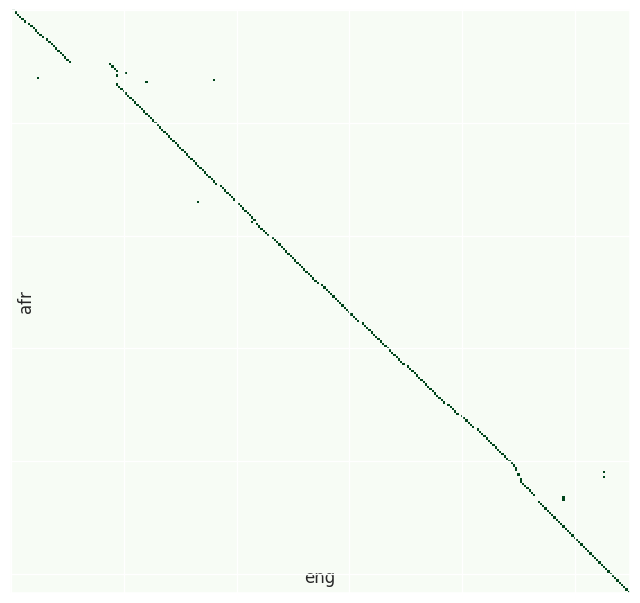

score: 0.8807692307692307


In [8]:
from lingtrain_aligner import vis_helper

vis_helper.visualize_alignment_by_db(db_path,
        output_path="alignment_vis.png",
        batch_size=1000,
        size=(800,800),
        lang_name_from=lang_from,
        lang_name_to=lang_to,
        batch_ids=[],
        plt_show=True,
        show_info=False)

print("score:", metrics.chain_score(db_path))

решим конфликты, возникшие из-за несовпадения количества предложений, за 5 шагов и визуализируем их

get_all_conflicts, handle_start: False handle_finish: False batch_id -1
conflicts to solve: 13
total conflicts: 16


  0%|          | 0/13 [00:00<?, ?it/s]

Loading distiluse-base-multilingual-cased-v2 model from Internet.


100%|██████████| 13/13 [00:14<00:00,  1.11s/it]


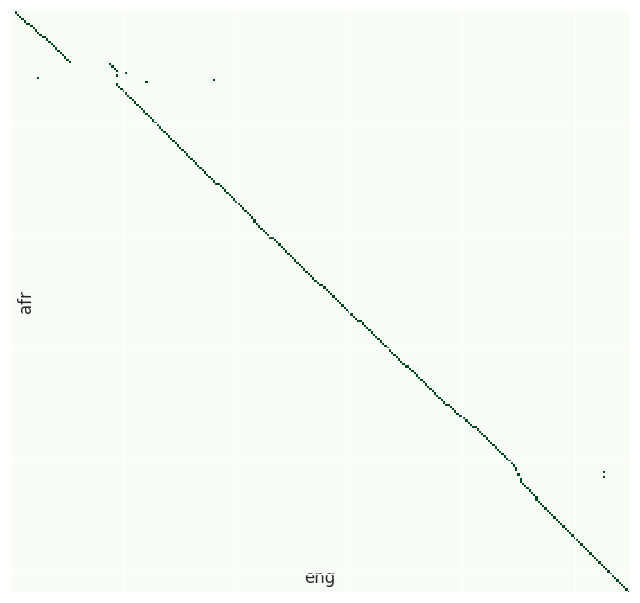

get_all_conflicts, handle_start: False handle_finish: False batch_id -1
conflicts to solve: 2
total conflicts: 3


100%|██████████| 2/2 [00:02<00:00,  1.46s/it]


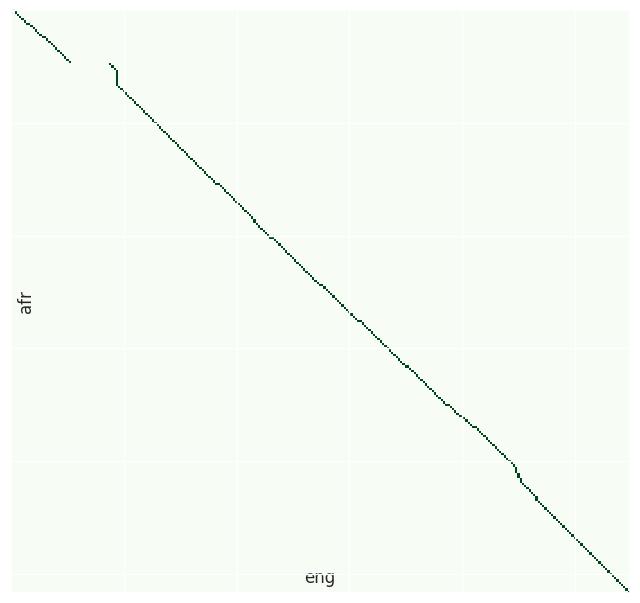

get_all_conflicts, handle_start: False handle_finish: False batch_id -1
conflicts to solve: 0
total conflicts: 1


0it [00:00, ?it/s]


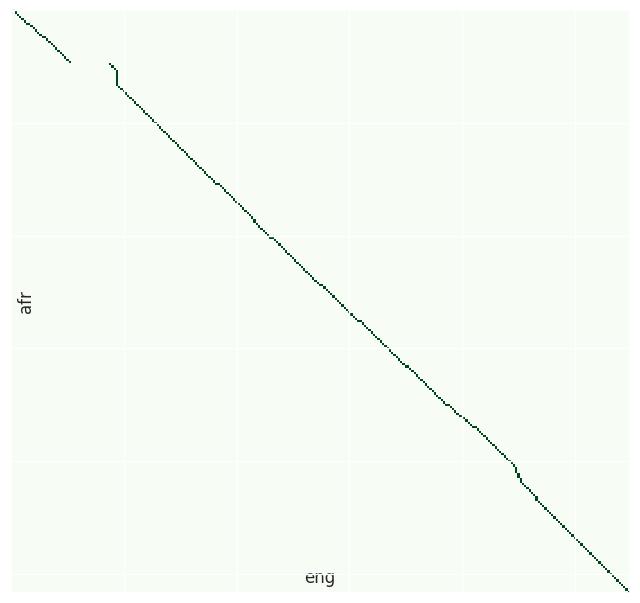

get_all_conflicts, handle_start: False handle_finish: False batch_id -1
conflicts to solve: 1
total conflicts: 1


100%|██████████| 1/1 [00:05<00:00,  5.68s/it]


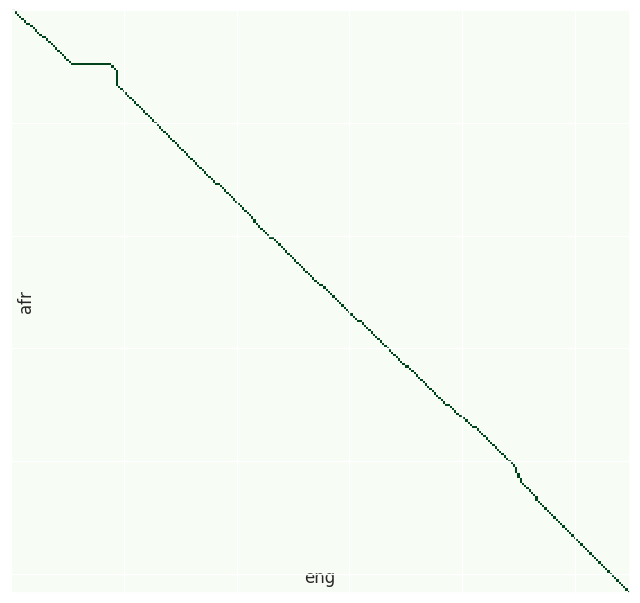

In [9]:
steps = 5

for i in range(steps):
    conflicts, rest = resolver.get_all_conflicts(db_path,
                        min_chain_length=2+i,
                        max_conflicts_len=6*(i+1),
                        batch_id=-1)

    resolver.resolve_all_conflicts(db_path, conflicts, model_name, show_logs=False)
    
    vis_helper.visualize_alignment_by_db(db_path, output_path="test.png", lang_name_from=lang_from, lang_name_to=lang_to, batch_size=400, size=(800,800), plt_show=True)


    if len(rest) == 0:
        break


посмотрим score теперь — он очень близок к 1

In [10]:
print("score:", metrics.chain_score(db_path))

score: 0.9963636363636363
